> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

So in this project i have selected the movie dataset and analysed it

Q1 Which genres are most popular from year to year?

Q2 What kinds of properties are associated with movies that have high revenues?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
#count the no of duplicates rows in the data
sum(df.duplicated())

1

In [5]:
#No of unique values in the column"s 
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#dropping columns from the csv file which are not likely to help in the analysis
df.drop(['homepage','tagline','imdb_id','overview','keywords'],axis = 1,inplace = True)
#info of the data about how many lines are left in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.3+ MB


In [7]:
#drop the rows with null values 
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 16 columns):
id                      9773 non-null int64
popularity              9773 non-null float64
budget                  9773 non-null int64
revenue                 9773 non-null int64
original_title          9773 non-null object
cast                    9773 non-null object
director                9773 non-null object
runtime                 9773 non-null int64
genres                  9773 non-null object
production_companies    9773 non-null object
release_date            9773 non-null object
vote_count              9773 non-null int64
vote_average            9773 non-null float64
release_year            9773 non-null int64
budget_adj              9773 non-null float64
revenue_adj             9773 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.3+ MB


In [8]:
# droping the duplicates rows
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [9]:
#converting the release_date column to datetime datatype
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 16 columns):
id                      9772 non-null int64
popularity              9772 non-null float64
budget                  9772 non-null int64
revenue                 9772 non-null int64
original_title          9772 non-null object
cast                    9772 non-null object
director                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
release_date            9772 non-null datetime64[ns]
vote_count              9772 non-null int64
vote_average            9772 non-null float64
release_year            9772 non-null int64
budget_adj              9772 non-null float64
revenue_adj             9772 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(5)
memory usage: 1.3+ MB


In [10]:
# conversion of genres datatype string to list so it is easy to understand
# and storing the datav=frame in new dataframe
df_clean = df.copy()
for loc,movies in df.iterrows():
    movies['genres'] = movies['genres'].split('|')
    df_clean.loc[loc,:] = movies    
df_clean.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Which genres are most popular from year to year?

In [11]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# construction of set of the genres values
# making the set of genres which are there in the list
genres_set = set()
for loc,movies in df_clean.iterrows():
    genres_set = genres_set | set(movies['genres'])
print(genres_set)

{'Science Fiction', 'Documentary', 'Fantasy', 'Adventure', 'Family', 'Mystery', 'Music', 'Comedy', 'Action', 'Romance', 'Western', 'Horror', 'War', 'History', 'Animation', 'Crime', 'TV Movie', 'Foreign', 'Thriller', 'Drama'}


In [12]:
# now remake the dataframe with respect to new genres set 
df_extended = df_clean.copy()
for loc,movie in df_extended.iterrows():
    for genre in genres_set:
        df_extended.loc[loc,genre] = genre in set(movie['genres'])
df_extended.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,...,Western,Horror,War,History,Animation,Crime,TV Movie,Foreign,Thriller,Drama
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,...,False,False,False,False,False,False,False,False,True,False
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,...,False,False,False,False,False,False,False,False,True,False
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,...,False,False,False,False,False,False,False,False,True,False
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,...,False,False,False,False,False,False,False,False,False,False
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,...,False,False,False,False,False,True,False,False,True,False


In [13]:
# no of movies per genre
genres_list = list(genres_set)
frequencies_of_genres = pd.Series(index = genres_set)
percentage_of_genres = pd.Series(index = genres_set)
for genre in genres_list:
    num = df_extended[genre].sum()
    frequencies_of_genres[genre] = num
    percentage_of_genres[genre] = num/float(df_extended[genre].count())*100


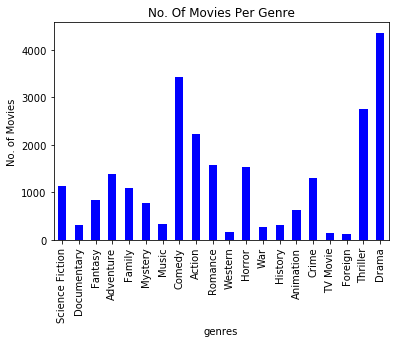

In [14]:
# plotting the graph for the frequencies of genre
frequencies_of_genres.plot(kind = 'bar',color='b');
plt.ylabel("No. of Movies")
plt.xlabel('genres')
plt.title("No. Of Movies Per Genre")

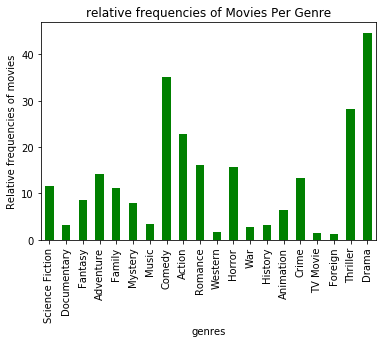

In [15]:
# plotting the graph for the percentage of genre
percentage_of_genres.plot(kind = 'bar',color='g')
plt.ylabel("Relative frequencies of movies")
plt.xlabel('genres')
plt.title("relative frequencies of Movies Per Genre")

so by this we know that the the movies whisch we are released know are more drama and comedy followed by the action and thriller.

Now we will see how the movie various from year to year

Drama              77.928571
Comedy             61.303571
Thriller           49.035714
Action             39.910714
Romance            28.035714
Horror             27.250000
Adventure          24.714286
Crime              23.196429
Science Fiction    20.285714
Family             19.553571
Fantasy            15.000000
Mystery            13.803571
Animation          11.017857
Music               6.053571
Documentary         5.660714
History             5.464286
War                 4.607143
Western             2.857143
TV Movie            2.357143
Foreign             2.142857
dtype: float64


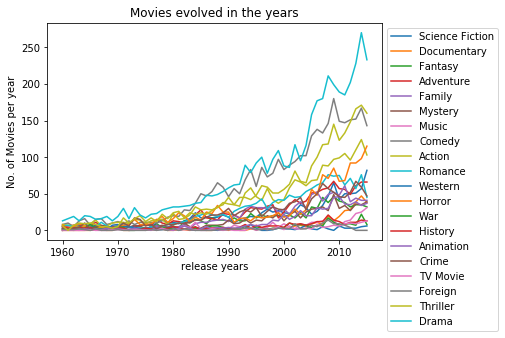

In [17]:
# creating the dataframe for genres 
hist_genres = pd.DataFrame()
for genre in genres_set:
    val = df_extended.groupby(['release_year'])[genre].sum()
    hist_genres[genre] = val
    index = hist_genres.index
    plt.plot(index,val)
plt.legend(genres_list,bbox_to_anchor=(1,1))
plt.ylabel("No. of Movies per year")
plt.xlabel('release years')
plt.title('Movies evolved in the years')
print(hist_genres.mean().sort_values(ascending = False))

till now we have known that how the genres has increased from year to year but not their popularity by know so know we further investigate to know about the popularity that it has increased in the genres from years and so that we can predict which movie genres are more popular.


In [18]:
#droping the genres column as it is not needed further in investigation
df_extended.drop(['genres'],axis=1,inplace = True)

In [19]:
# we will convert the datatypes of genres from boolean to int
for genre in genres_set:
    df_extended[genre] = df_extended[genre].astype(int)
df_extended.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,...,Western,Horror,War,History,Animation,Crime,TV Movie,Foreign,Thriller,Drama
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,...,0,0,0,0,0,0,0,0,1,0
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,...,0,0,0,0,0,0,0,0,1,0
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,...,0,0,0,0,0,0,0,0,1,0
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,...,0,0,0,0,0,0,0,0,0,0
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Universal Pictures|Original Film|Media Rights ...,2015-04-01,...,0,0,0,0,0,1,0,0,1,0


In [20]:
# here we have created the popularity of the genres only by making the new columns and multiplying the genres value
#with the popularity so that we can sum up the values have an change in year
for genre in genres_set:
    df_extended['popularity_'+genre]=np.array(df_extended['popularity']).T*np.array(df_extended[genre])
df_extended.head()


,id,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,...,popularity_Western,popularity_Horror,popularity_War,popularity_History,popularity_Animation,popularity_Crime,popularity_TV Movie,popularity_Foreign,popularity_Thriller,popularity_Drama
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,32.985763,0.0
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,28.419936,0.0
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,13.112507,0.0
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Universal Pictures|Original Film|Media Rights ...,2015-04-01,...,0.0,0.0,0.0,0.0,0.0,9.335014,0.0,0.0,9.335014,0.0


Drama              77.928571
Comedy             61.303571
Thriller           49.035714
Action             39.910714
Romance            28.035714
Horror             27.250000
Adventure          24.714286
Crime              23.196429
Science Fiction    20.285714
Family             19.553571
Fantasy            15.000000
Mystery            13.803571
Animation          11.017857
Music               6.053571
Documentary         5.660714
History             5.464286
War                 4.607143
Western             2.857143
TV Movie            2.357143
Foreign             2.142857
dtype: float64


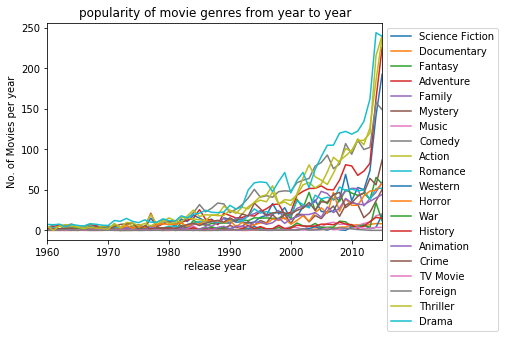

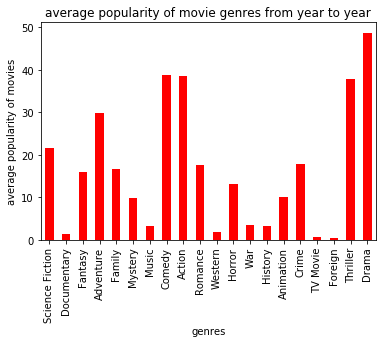

In [21]:
# n_popularityo of movies per genre and change from year to year
popularity_genre = pd.DataFrame()
plt.figure()
for genre in genres_set:
    popularity_genre[genre] = df_extended.groupby('release_year')['popularity_'+genre].sum()
popularity_genre.plot()
plt.legend(genres_list,bbox_to_anchor=(1,1))
plt.title('popularity of movie genres from year to year')
plt.ylabel("No. of Movies per year")
plt.xlabel('release year')
print(hist_genres.mean().sort_values(ascending = False))
plt.figure()
popularity_genre.mean().plot(kind = 'bar',color='r')
plt.title('average popularity of movie genres from year to year')
plt.ylabel("average popularity of movies")
plt.xlabel('genres')

till now we have got that day by day demand of movies are increasing so mainly the popularity of the drama movie are high as it is being liked by everyone and it is best to watch. After the popularity of the drama movies comedy,thriller and action almost have the same average popularity so they are liked by each and will have a great interest to watch.
So at the end i can say that drama movies popularity has increased from year to year and are mostly liked by the people who watch the movie and enjoy it.

Adventure          0.973833
Animation          0.898964
Fantasy            0.808658
Science Fiction    0.799451
Action             0.787558
Family             0.731861
Thriller           0.663151
Crime              0.660675
War                0.649854
Mystery            0.583487
Western            0.556122
History            0.546024
Comedy             0.541546
Drama              0.537846
Romance            0.537579
Music              0.504128
Horror             0.438620
TV Movie           0.296711
Documentary        0.210520
Foreign            0.208544
dtype: float64


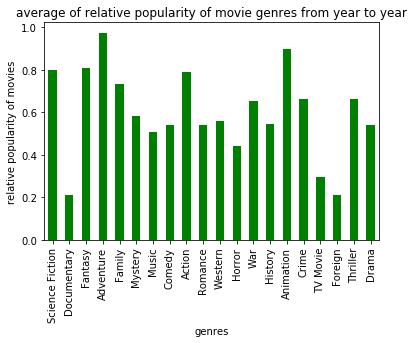

In [22]:
popularity_genre_relative = pd.DataFrame()
for genre in genres_set:
    values = df_extended.groupby('release_year')['popularity_'+genre].sum()/hist_genres[genre]
    popularity_genre_relative[genre] = values
    
print(popularity_genre_relative.mean().sort_values(ascending=False))
plt.figure()
popularity_genre_relative.mean().plot(kind='bar',color='g')
plt.title('average of relative popularity of movie genres from year to year')
plt.ylabel("relative popularity of movies")
plt.xlabel('genres')

### What kinds of properties are associated with movies that have high revenues?

In [23]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
# sorting the dataframe according to revenue so to see the highest earning movies first
df_clean.sort_values('revenue',ascending=False).head(15)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,"[Action, Adventure, Fantasy, Science Fiction]",Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
5231,597,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,"[Drama, Romance, Thriller]",Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09
4361,24428,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,"[Science Fiction, Action, Adventure]",Marvel Studios,2012-04-25,8903,7.3,2012,2.089437e+08,1.443191e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
14,99861,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,"[Action, Adventure, Science Fiction]",Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015,2.575999e+08,1.292632e+09
3374,12445,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,130,"[Adventure, Family, Fantasy]",Warner Bros.|Heyday Films|Moving Picture Compa...,2011-07-07,3750,7.7,2011,1.211748e+08,1.287184e+09
5422,109445,6.112766,150000000,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,102,"[Animation, Adventure, Family]",Walt Disney Pictures|Walt Disney Animation Stu...,2013-11-27,3369,7.5,2013,1.404050e+08,1.192711e+09
5425,68721,4.946136,200000000,1215439994,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,130,"[Action, Adventure, Science Fiction]",Marvel Studios,2013-04-18,6882,6.9,2013,1.872067e+08,1.137692e+09


In [50]:
# to find out the correlation between the datatypes
df_clean.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,0.002229,-0.136511,-0.095342,-0.097810,-0.026940,-0.088895,0.509448,-0.187132,-0.137220
popularity,0.002229,1.000000,0.538921,0.662405,0.156290,0.802956,0.239121,0.110944,0.505378,0.606458
budget,-0.136511,0.538921,1.000000,0.731204,0.214292,0.627068,0.096051,0.138239,0.968315,0.616327
revenue,-0.095342,0.662405,0.731204,1.000000,0.183293,0.788533,0.192026,0.071738,0.702365,0.918032
runtime,-0.097810,0.156290,0.214292,0.183293,1.000000,0.184285,0.193973,-0.133793,0.249134,0.198307
vote_count,-0.026940,0.802956,0.627068,0.788533,0.184285,1.000000,0.279851,0.124726,0.580444,0.704044
vote_average,-0.088895,0.239121,0.096051,0.192026,0.193973,0.279851,1.000000,-0.140046,0.109789,0.214668
release_year,0.509448,0.110944,0.138239,0.071738,-0.133793,0.124726,-0.140046,1.000000,0.036102,-0.056305
budget_adj,-0.187132,0.505378,0.968315,0.702365,0.249134,0.580444,0.109789,0.036102,1.000000,0.640852
revenue_adj,-0.137220,0.606458,0.616327,0.918032,0.198307,0.704044,0.214668,-0.056305,0.640852,1.000000


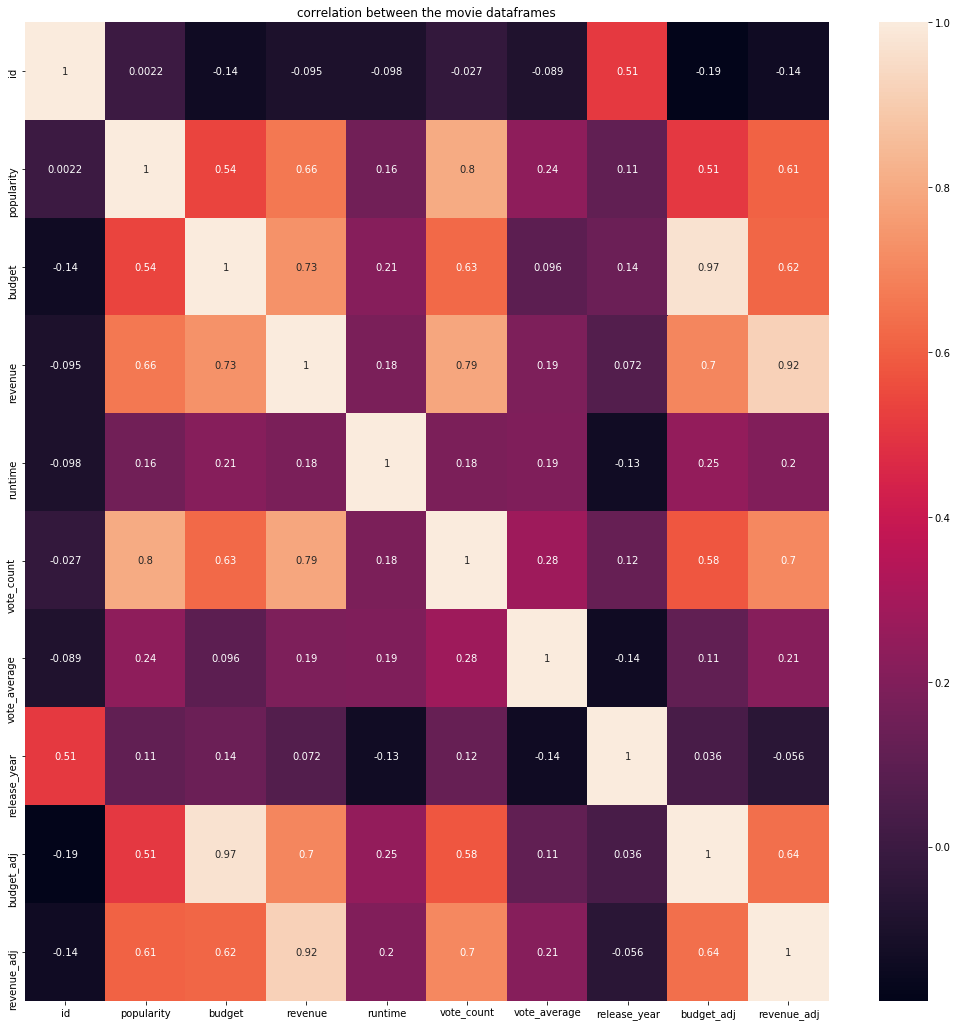

In [24]:
# to see the heatmap of correlations
plt.figure(figsize=(18,18))
sns.heatmap(df_clean.corr(),annot = True)
plt.title("correlation between the movie dataframes")

So to find out the which properties are associated with high revenue movie are:

1) vote_count :- so movie with high vote count has higher revenue and is more loved by the audience so that's why they give high votes and due to which movie revenue is high

2) Budget :- if the movies budget is high it tends to have more revenue as it's making cost is high

3) popularity :- if the popularity of movie is high in the market due to that it's revenue is high

if the famous celebrities work in the movie due to that also movie can earn much

But this dataset is not enough to now the correlation of popularity and the vote count as it is different onthis link:-
https://developers.themoviedb.org/3/getting-started/popularity

But now we can check the correlation in df_extended dataframe to know the relation between the genres and revenue but this also not make difference in our analysis.


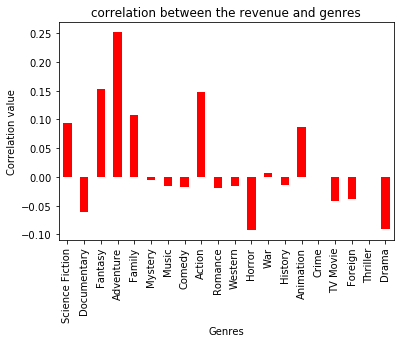

In [26]:
extended_corr = df_extended.corr()
revenue_of_genres = extended_corr.loc['revenue','Science Fiction':'Drama']
revenue_of_genres.plot(kind = 'bar',color = 'r')
plt.title('correlation between the revenue and genres')
plt.xlabel('Genres')
plt.ylabel('Correlation value')

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. It's also a good idea to look over the project rubric, found on the project submission page at the end of the lesson.

> To export the report to the workspace, you should run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the jupyter icon in the upper left). Alternatively, you can download the html report via the **File** > **Download as** submenu and then manually upload it to the workspace directory. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right. Congratulations!

> **MOST POPULAR genres:** so the most popular genres are not linked to the the no. of movies in that genres but the popularity of the genres depend on the creativity and popularity of the movies and genres movies liked by the audience and it has been depend on the interest of the personf so know the most popular genres are:
- Adventure          0.973833
- Animation          0.898964
- Fantasy            0.808658
- Science Fiction    0.799451
- Action             0.787558
- Family             0.731861

so by the values we have got to know that the audience like the adventutres movie more than any other genres and they love to watch the movies.

>**REVENUE:** so the revenue of the movie depends on the budget and celebrities casted in that movie and it also depend on the director also as he/she has directed it well and the movie story line is good. The movie's revenue is also on the popularity and no of votes given by the viewrs and how much the movie is liked. And it is natural thing that popularity of movie is due to the audience and due to that revenue is also from the audience

Now,I want to say that they should also include the age and gender it it due to that we can more preciesely say that which age group likes which genres or we can say that which genre is most liked by the males and which one is liked by the females and we can get the more precise answer and we can analys it better. And they should add the countryies also so that we can know the taste of different countries and can tell only these type of movies can earn good in those countries 



In [27]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0